In [1]:
from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
test['loss'] = np.nan
train_test = pd.concat([train, test])
print(train.shape)
print(test.shape)

(188318, 132)
(125546, 132)


# Preprocess
- preprocess the data and save them to build models later.

## Removing values
- removing categorical values existing only in train data.
  - It is not meaningful for Machine Learning models to learn categorical values only in train data. That's because they can't use such values to make predictions even after learning.
  - Therefore I removed the values and think them as missing values.
- removing categorical values existing only in test data.
  - In training process, models can't learn categorical values only in test data. So in predicting process, they can't use such values to make predictions.
  - Therefore I removed the values and think them as missing values.

## Factorization
- factorizing categorical features in lexicographical order.

In [12]:
for column in list(train.select_dtypes(include=['object']).columns):
    
    # remove categorical values existing only in train data or test data
    if train[column].nunique() != test[column].nunique():
        set_train = set(train[column].unique())
        set_test = set(test[column].unique())
        remove_train = set_train - set_test
        remove_test = set_test - set_train
        remove = remove_train.union(remove_test)

        def filter_cat(x):
            if x in remove:
                return np.nan
            return x

        train_test[column] = train_test[column].apply(lambda x: filter_cat(x), 1)
    
    # Factorize the categorical features in lexicographical order
    train_test[column] = pd.factorize(train_test[column].values, sort=True)[0]

In [13]:
train_removed = train_test[train_test['loss'].notnull()]
test_removed = train_test[train_test['loss'].isnull()]

In [6]:
# log(target + shift) transform for the train data
shift = 200
train['loss'] = np.log(train['loss'] + shift)

/Users/fujiki/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,7.788701
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,7.302227
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,8.072495
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,7.038652
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,7.994244


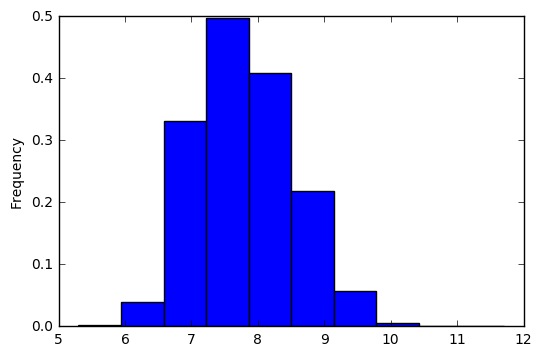

In [16]:
train['loss'].plot(kind='hist', normed=True)
plt.show()

In [14]:
# Export as CSV
train.to_csv('data/train_preprocessed.csv', index=False)
test.to_csv('data/test_preprocessed.csv', index=False)

## removed and dummied data

In [3]:
# remove some categorical values

for column in list(train.select_dtypes(include=['object']).columns):
    
    # remove categorical values existing only in train data or test data
    if train[column].nunique() != test[column].nunique():
        set_train = set(train[column].unique())
        set_test = set(test[column].unique())
        remove_train = set_train - set_test
        remove_test = set_test - set_train
        remove = remove_train.union(remove_test)

        def filter_cat(x):
            if x in remove:
                return np.nan
            return x

        train_test[column] = train_test[column].apply(lambda x: filter_cat(x), 1)

In [4]:
train_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
train_test_remove_one_hot = pd.get_dummies(train_test)
print(train_test_remove_one_hot.shape)

(313864, 1085)


In [7]:
for col in train_test_remove_one_hot.columns:
    if train_test_remove_one_hot[col].isnull().sum() > 0:
        print(col)

loss


In [41]:
train_test_remove_one_hot.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat116_MU,cat116_MV,cat116_MW,cat116_O,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_Y
0,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
train_removed_one_hot = train_test_remove_one_hot[train_test_remove_one_hot['loss'].notnull()]
test_removed_one_hot = train_test_remove_one_hot[train_test_remove_one_hot['loss'].isnull()]
print(train_removed_one_hot.shape)
print(test_removed_one_hot.shape)

(188318, 1085)
(125546, 1085)


In [12]:
train_removed_one_hot = pd.read_csv('./data/train_removed_one_hot.csv')
test_removed_one_hot = pd.read_csv('./data/test_removed_one_hot.csv')

In [13]:
print(train_removed_one_hot.shape)
print(test_removed_one_hot.shape)

(188318, 1085)
(125546, 1085)
